# Import libraries and load csv file

In [47]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import seaborn as sns 
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv(r'D:\1. Data\1.Data analysis document\POWER BI\Raw data\Coffee Shop Sales.csv')
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,1/1/2023,7:06:11 AM,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,1/1/2023,7:08:56 AM,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,1/1/2023,7:14:04 AM,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,1/1/2023,7:20:24 AM,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,1/1/2023,7:22:41 AM,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,6/30/2023,8:18:41 PM,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,6/30/2023,8:25:10 PM,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,6/30/2023,8:31:34 PM,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,6/30/2023,8:57:19 PM,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


# Clean data

In [49]:
df.info() # Checking data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB


In [50]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'],format='%m/%d/%Y') # Convert date column to datetime data type
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%I:%M:%S %p').dt.floor('h').dt.time # Round down time to nearest hour
df['transaction_month'] = df['transaction_date'].dt.strftime('%b %Y') # Adding a new colum as month year
df['total_sale'] = df['transaction_qty']*df['unit_price'] # Adding a new column as total sale

In [51]:
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction_month,total_sale
0,1,2023-01-01,07:00:00,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,Jan 2023,6.00
1,2,2023-01-01,07:00:00,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,Jan 2023,6.20
2,3,2023-01-01,07:00:00,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,Jan 2023,9.00
3,4,2023-01-01,07:00:00,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,Jan 2023,2.00
4,5,2023-01-01,07:00:00,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,Jan 2023,6.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:00:00,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,Jun 2023,5.00
149112,149453,2023-06-30,20:00:00,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,Jun 2023,6.00
149113,149454,2023-06-30,20:00:00,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,Jun 2023,3.00
149114,149455,2023-06-30,20:00:00,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,Jun 2023,3.75


# Analysis

## Total sales, qty and transaction

In [52]:
total_sales = (df['transaction_qty']*df['unit_price']).sum()
print(f'Total sale is {round(total_sales,2)}')
total_qty = df['transaction_qty'].sum()
print(f'Total sold quantity is {total_qty}')
total_transaction = df['transaction_id'].nunique()
print(f'Total order is {total_transaction}')

Total sale is 698812.33
Total sold quantity is 214470
Total order is 149116


## Analysis per month

In [53]:
# Sorting month names in order 
start_month = pd.to_datetime(df['transaction_date']).min()
end_month = pd.to_datetime(df['transaction_date']).max()
months_range = pd.date_range(start_month, end_month,freq='MS').strftime('%b %Y')
months_range

# Total sale, quantity and order month over month
month_df =df.groupby('transaction_month')[['total_sale','transaction_qty','transaction_id']].agg(
    sale = ('total_sale','sum'),
    quantity = ('transaction_qty','sum'),
    order = ('transaction_id','count')
).loc[months_range].reset_index().rename(columns={'index':'month'})
month_df

,month,sale,quantity,order
0,Jan 2023,81677.74,24870,17314
1,Feb 2023,76145.19,23550,16359
2,Mar 2023,98834.68,30406,21229
3,Apr 2023,118941.08,36469,25335
4,May 2023,156727.76,48233,33527
5,Jun 2023,166485.88,50942,35352


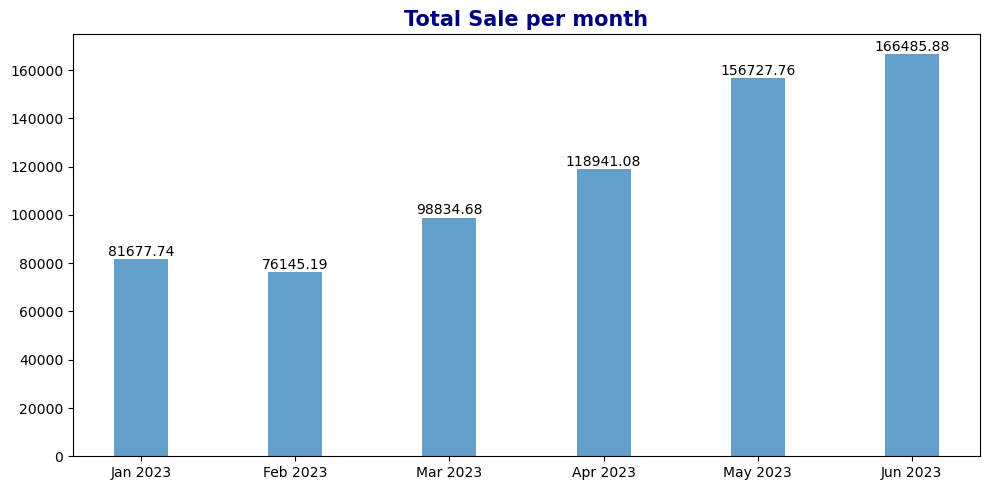

In [54]:
# Display sale to bar chart

plt.figure(figsize=(10,5))
x_pos = np.arange(len(month_df))
width = 0.35
#Create bar chart
bars = plt.bar(x_pos, month_df['sale'], width, label='Sale', alpha=0.7)
plt.xticks(x_pos,month_df['month'])
# Add data label
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 100,
             f'{month_df['sale'][i]}', ha='center', va='bottom')
plt.title('Total Sale per month',loc='center', fontsize=15,fontweight='bold',color='navy' )
plt.tight_layout()
plt.show()

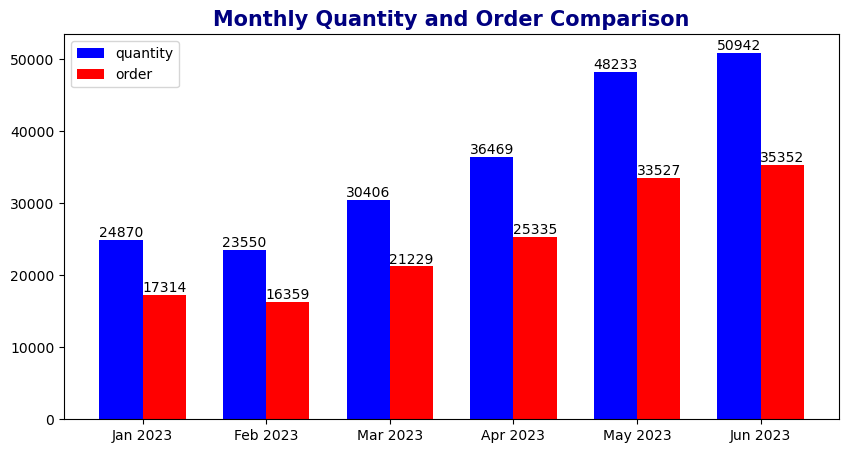

In [55]:
# Display quantity and order 
plt.figure(figsize=(10,5))
bars_quantity = plt.bar(x_pos-width/2,month_df['quantity'],width,label='quantity',color='blue')
bars_order = plt.bar(x_pos+width/2,month_df['order'],width,label='order',color='red')
for bar in bars_quantity:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

for bar in bars_order:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
# Labeling the axes and title
plt.title('Monthly Quantity and Order Comparison',loc='center', fontsize=15,fontweight='bold',color='navy')
plt.xticks(x_pos, month_df['month'])
plt.legend()
plt.show()

## Sale per products

In [56]:
# Revenue per product
top_product = df.groupby('product_type')[['total_sale','transaction_qty','transaction_id']].agg(
    sale = ('total_sale','sum'),
    quantity = ('transaction_qty','sum'),
    order = ('transaction_id','count')
).reset_index()


In [57]:
# Top 5 products per revenue
top5_sale_products = top_product.sort_values(by='sale',ascending=False).head(5)
top5_sale_products

,product_type,sale,quantity,order
0,Barista Espresso,91406.20,24943,16403
4,Brewed Chai tea,77081.95,26250,17183
17,Hot chocolate,72416.00,17457,11468
13,Gourmet brewed coffee,70034.60,25973,16912
3,Brewed Black tea,47932.00,17462,11350


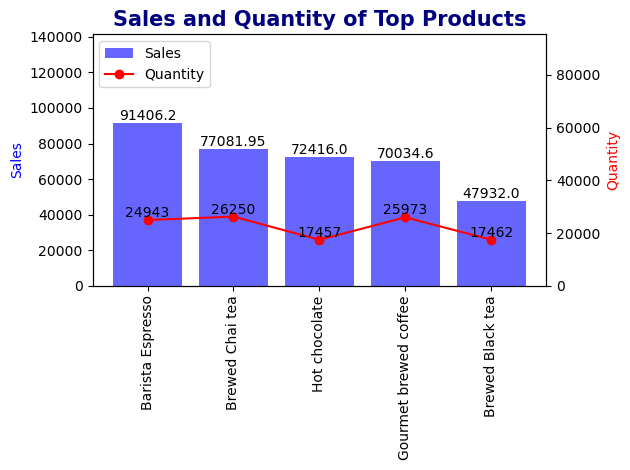

In [58]:
# Set up the figure and axes
fig, ax1 = plt.subplots()
# Bar chart for sales
bars = ax1.bar(top5_sale_products['product_type'], top5_sale_products['sale'], color='b', alpha=0.6, label='Sales')
ax2 = ax1.twinx()
line = ax2.plot(top5_sale_products['product_type'], top5_sale_products['quantity'], color='r', marker='o', label='Quantity')
# Adding data labels for the bars
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Adding data labels for the line
for i, qty in enumerate(top5_sale_products['quantity']):
    ax2.text(i, qty, qty, ha='center', va='bottom')
# Labeling the axes and title
ax1.set_ylabel('Sales', color='b')
ax2.set_ylabel('Quantity', color='r')
# Rotate x-axis labels
ax1.set_xticks(range(len(top5_sale_products)))  # Set x-tick positions
ax1.set_xticklabels(top5_sale_products['product_type'], rotation=90)  # Set labels with rotation
ax1.set_ylim(0, max(top5_sale_products['sale']+50000))
ax2.set_ylim(0, max(top5_sale_products['sale']+4000))
plt.title('Sales and Quantity of Top Products',loc='center', fontsize=15,fontweight='bold',color='navy')

# Create a combined legend
lines = [bars[0], line[0]]  # Use the first bar and line for legend
labels = ['Sales', 'Quantity']
ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(0, 1), frameon=True)

# Show the plot
plt.tight_layout()
plt.show()

In [59]:
# Top 5 products per quantity
top5_quantity_products = top_product.sort_values(by='quantity',ascending=False).head(5)
top5_quantity_products[['product_type','quantity', 'sale']]

,product_type,quantity,sale
4,Brewed Chai tea,26250,77081.95
13,Gourmet brewed coffee,25973,70034.60
0,Barista Espresso,24943,91406.20
3,Brewed Black tea,17462,47932.00
17,Hot chocolate,17457,72416.00


In [60]:
# Bottom 5 products per quantity
bottom5_quantity_products = top_product.sort_values(by='quantity',ascending=False).tail(5)
bottom5_quantity_products[['product_type','quantity', 'sale']]

,product_type,quantity,sale
21,Organic Chocolate,221,1679.60
8,Clothing,221,6163.00
18,House blend Beans,183,3294.00
15,Green tea,159,1470.75
14,Green beans,134,1340.00


C:\Users\Admin\AppData\Local\Temp\ipykernel_14036\1950952535.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top5_quantity_products['product_type'], rotation=90)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14036\1950952535.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(bottom5_quantity_products['product_type'], rotation=90)


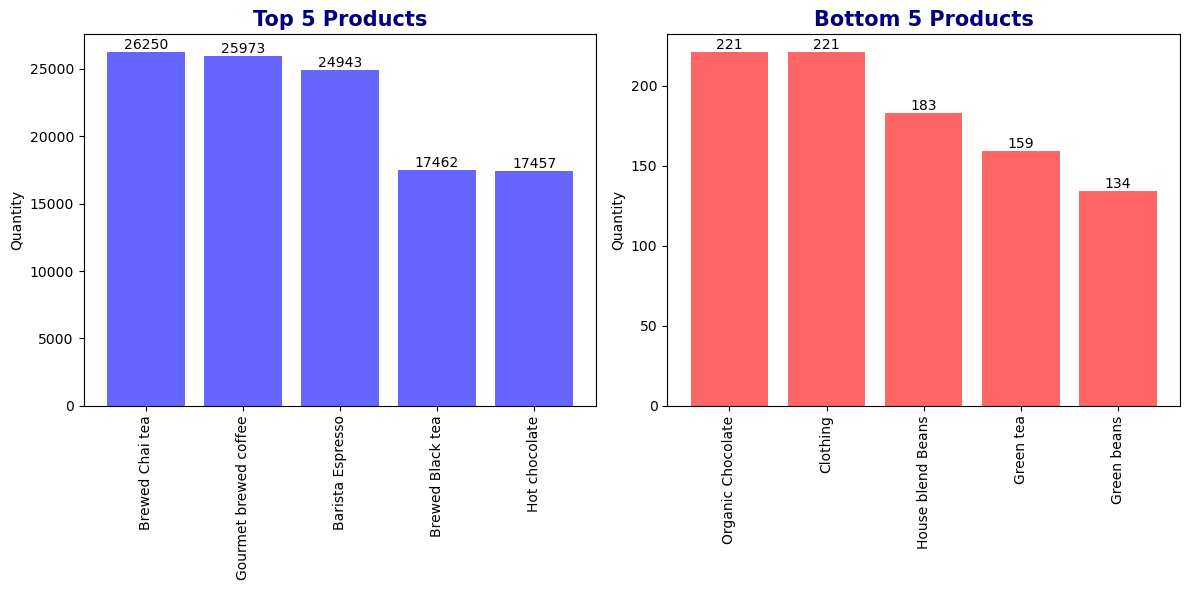

In [61]:
# Top 5 and bottom 5 products
# Set up the figure and axes
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
# Bar chart for top products
bars_top = ax1.bar(top5_quantity_products['product_type'], top5_quantity_products['quantity'], color='blue', alpha=0.6)
ax1.set_title('Top 5 Products',loc='center', fontsize=15,fontweight='bold',color='navy')
ax1.set_ylabel('Quantity')
ax1.set_xticklabels(top5_quantity_products['product_type'], rotation=90)

# Bar chart for bottom products
bars_bottom = ax2.bar(bottom5_quantity_products['product_type'], bottom5_quantity_products['quantity'], color='red', alpha=0.6)
ax2.set_title('Bottom 5 Products',loc='center', fontsize=15,fontweight='bold',color='navy')
ax2.set_ylabel('Quantity')
ax2.set_xticklabels(bottom5_quantity_products['product_type'], rotation=90)

# Adding data labels for the top bars
for bar in bars_top:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Adding data labels for the bottom bars
for bar in bars_bottom:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
    
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Sale per location


In [62]:
location = df.groupby('store_location')['total_sale'].sum().reset_index()
location['proportion'] = round(location['total_sale']/ total_sales*100,2)
location

,store_location,total_sale,proportion
0,Astoria,232243.91,33.23
1,Hell's Kitchen,236511.17,33.84
2,Lower Manhattan,230057.25,32.92


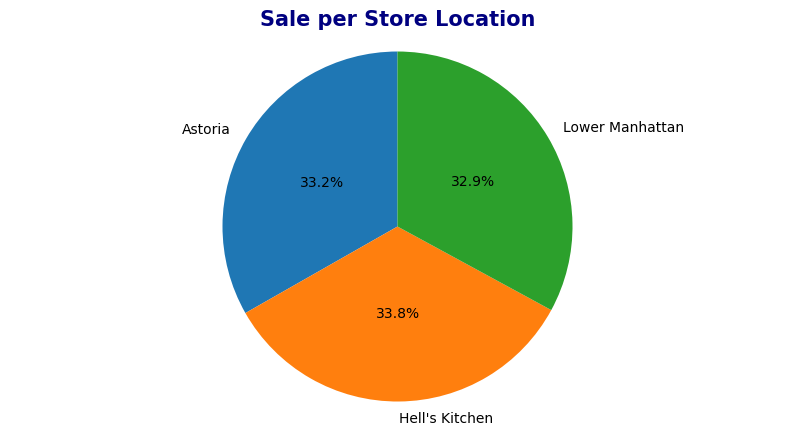

In [63]:
# Create the pie chart
plt.figure(figsize=(10, 5))
ax = plt.pie(
    x=location['proportion'],
    labels=location['store_location'],
    autopct='%1.1f%%',  # Display percentage with one decimal place
    startangle=90,      # Start the pie chart at a specific angle
    pctdistance=0.5    # Move the percentage labels slightly inside the pie chart
)
# Move the legend inside the pie chart
# Title of the pie chart
plt.title('Sale per Store Location',loc='center', fontsize=15,fontweight='bold',color='navy')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()

## Order by time

In [64]:
# adding a new colums as day
df['day'] = df['transaction_date'].dt.strftime('%a')
# Aggregating data frame per day and time
df2 = df.groupby(['transaction_date','day','transaction_time'])['transaction_id'].count().reset_index() 
df3 = df2.groupby(['day', 'transaction_time']).agg(
    avg_trans=('transaction_id', 'mean')
).reset_index()
#converting data fram to pivot to display heatmap easily
df4 = pd.pivot_table(
    data= df3,
    values= 'avg_trans',
    index= 'transaction_time',
    columns= 'day',
    aggfunc= 'mean'
).reset_index().round(2)
df4 = df4[['transaction_time','Mon','Tue','Wed','Thu','Fri','Sat','Sun']]
df4.set_index('transaction_time',inplace=True)

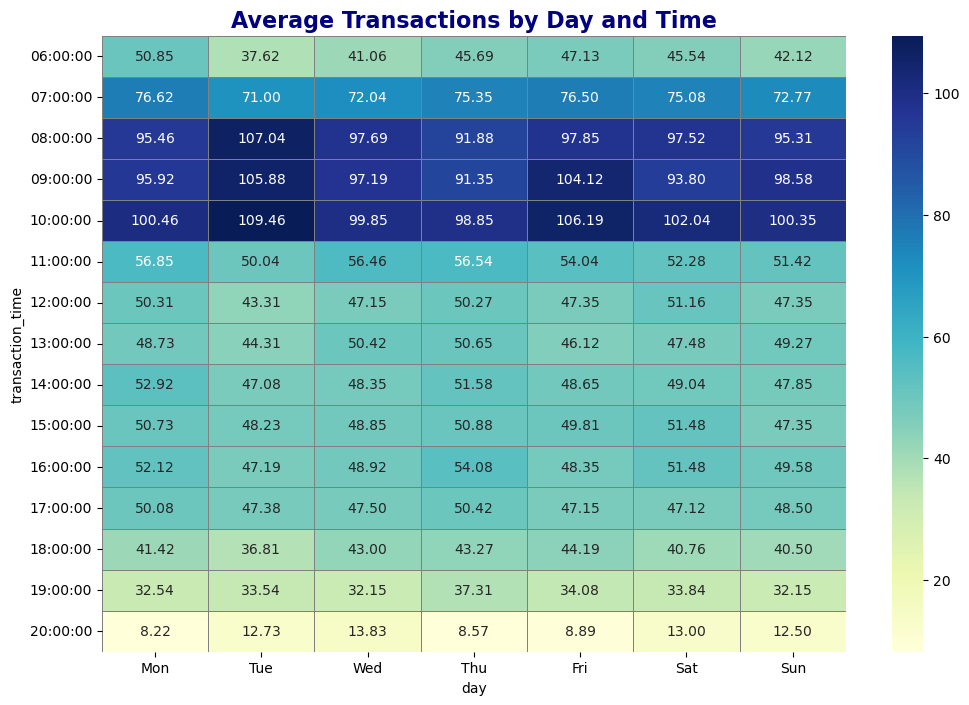

In [65]:
# Create the heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(df4, annot=True, fmt=".2f", cmap='YlGnBu', cbar=True, linewidths=0.5, linecolor='gray')
# Set the title and labels
plt.title('Average Transactions by Day and Time', fontsize=16, fontweight = 'bold', color='navy')

# Show the plot
plt.show()